# Titanic challenge

## This is my decision for the Kaggle competition, Titanic: Machine Learning from Disaster.

In [1]:
# -*- coding: utf-8 -*-
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

In [2]:
# Load the train and test datasets to create two DataFrames
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Let's examine the first pair of lines of loaded data frames

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## I have to predict which passenger survived, and which one is not. Let's go!
## Let's examine statistic of survived.

In [5]:
print(train["Survived"].value_counts())
print(train["Survived"].value_counts(normalize = True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


## Statistics of men who survived against men who died.

In [6]:
print(train["Survived"][train["Sex"] == 'male'].value_counts())
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True))

0    468
1    109
Name: Survived, dtype: int64
0    0.811092
1    0.188908
Name: Survived, dtype: float64


## Statistics of women who survived against women who died

In [7]:
print(train["Survived"][train["Sex"] == 'female'].value_counts())
print(train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True))

1    233
0     81
Name: Survived, dtype: int64
1    0.742038
0    0.257962
Name: Survived, dtype: float64


## Summarizing, we construct a chart

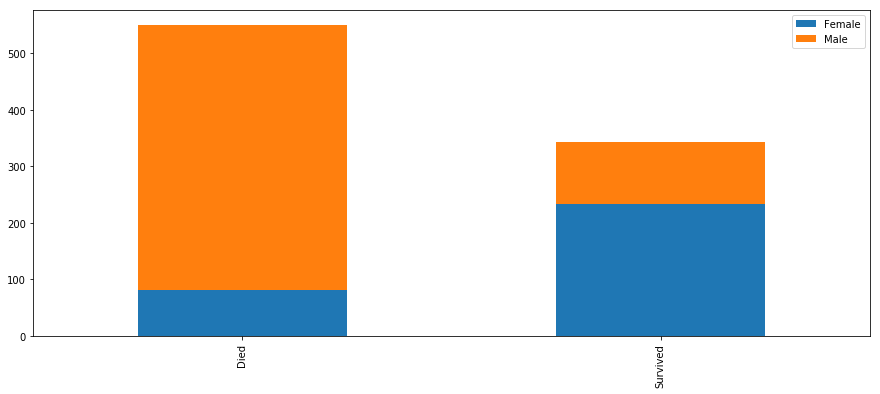

In [8]:
survived_class = pd.crosstab(index=train["Survived"],
                            columns=train["Sex"])   # Include row and column totals
survived_class.columns = ["Female","Male"]
survived_class.index = ["Died","Survived"]
survived_class.plot(kind="bar",
                 figsize=(15,6),
                 stacked=True)
plt.show()

Women have more chance to survive

## Let's now correlate the survival with the age variable.

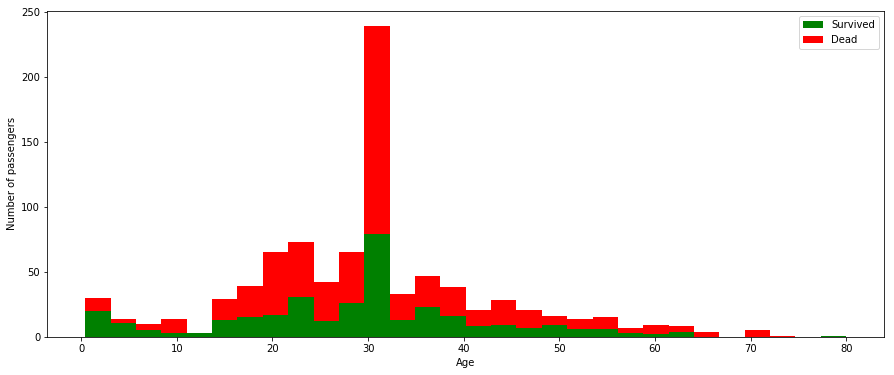

In [9]:
train['Age'].fillna((train['Age'].mean()), inplace=True)
figure = plt.figure(figsize=(15,6))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

If you follow the chart bin by bin, you will notice that passengers who are less than 10 are more likely to survive than older ones who are more than 12 and less than 50. Older passengers seem to be rescued too.

## Let's now focus on the Fare ticket of each passenger and correlate it with the survival.

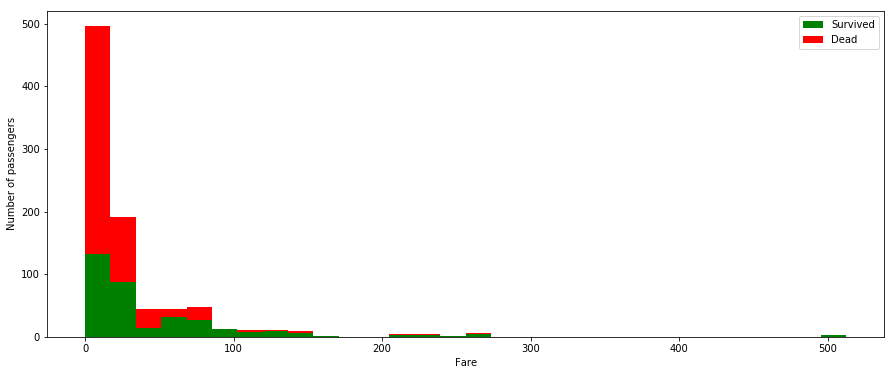

In [10]:
figure = plt.figure(figsize=(15,6))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

## Let's now see how the embarkation site affects the survival.

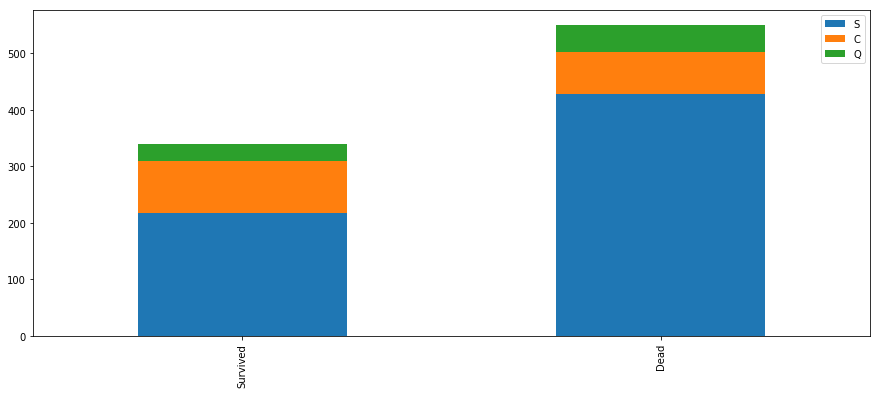

In [11]:
embark = train[train['Survived'] == 1]['Embarked'].value_counts()
dead_embark = train[train['Survived'] == 0]['Embarked'].value_counts()
df = pd.DataFrame([embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,6))
plt.show()

There seems to be no distinct correlation here.

## Feature Engineering and prediction

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Convert the male and female groups to integer form into train
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Convert the male and female groups to integer form into test
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

In [13]:
# Impute the Embarked variable into train
train["Embarked"] = train["Embarked"].fillna("S")

# Convert the Embarked classes to integer form into train
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

# Impute the Embarked variable into test
test["Embarked"] = test["Embarked"].fillna("S")

# Convert the Embarked classes to integer form into test
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

In [14]:
# Print the train data to see the available features and clean data
train = train.drop(['Cabin'], axis=1)
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [15]:
# Print the train data to see the available features and clean data
test = test.drop(['Cabin'], axis=1)
test['Age'].fillna((test['Age'].mean()), inplace=True)

Let's use the Random Forest Classifier. 

In [16]:
# Building  my_forest
y_train = train['Survived']
X_train = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
test_features = Imputer().fit_transform(test_features)

# Fit model and print score
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train, y_train)
print(my_forest.score(X_train, y_train))

0.938271604938


In [17]:
# Make prediction
prediction = my_forest.predict(test_features)

In [18]:
# Write a solution on csv file
solution = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
solution.to_csv('solution.csv', index=False)

I have scored 0.74162 on Kaggle.